### **KUIS 2 - Machine Learning**
### Nama : M. RIZKY MAFAZAN
### Kelas : 3F - TI
### Absen : 16

# Import Library

In [1]:
# Mengimport beberapa pustaka dan modul Python
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [75]:
# Menggunakan TensorFlow untuk mengimpor dataset MNIST
from tensorflow.keras.datasets import mnist

In [3]:
# Melakukan pemuatan data dari dataset MNIST menggunakan metode load_data() yang disediakan oleh TensorFlow.
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Melakukan pemeriksaan bentuk (shape) dari data latih dan data uji dalam dataset MNIST
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [5]:
# Melakukan pemeriksaan bentuk (shape) dari label untuk data latih dan data uji dalam dataset MNIST
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [6]:
# Memeriksa bentuk (shape) dari gambar pertama dalam data latih (train_data).
train_data[0].shape

(28, 28)

In [7]:
# Memeriksa bentuk (shape) dari label pada data latih (train_labels)
train_labels.shape

(60000,)

### Combine Train and Test Data

In [8]:
# Menggabungkan data dari set pelatihan (train_data dan train_labels) dan set pengujian (test_data dan test_labels) untuk membentuk satu set data dan satu set label yang mencakup keseluruhan dataset MNIST
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [9]:
# Memeriksa bentuk (shape) dari digits_data
digits_data.shape

(70000, 28, 28)

In [10]:
# Memeriksa bentuk (shape) dari digits_labels
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 5')

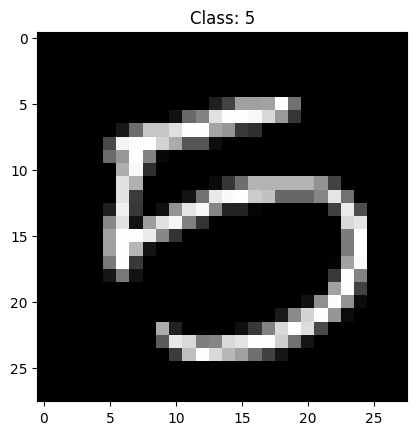

In [11]:
# Menampilkan gambar acak dari dataset MNIST
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

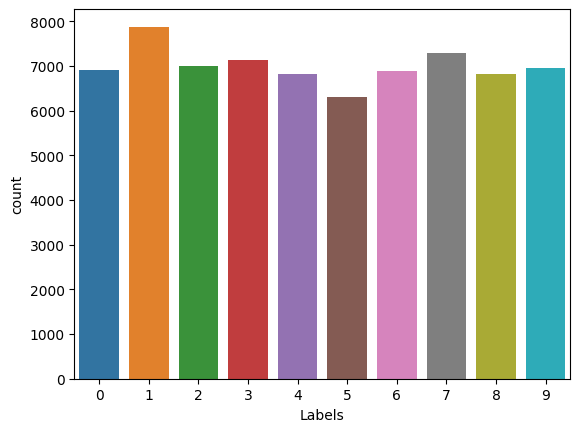

In [12]:
# Memberikan gambaran tentang seberapa seimbang atau tidak seimbangnya distribusi label dalam dataset
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [13]:
# Mengunduh file zip dari URL yang disediakan
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-05 07:00:08--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   125MB/s    in 1.5s    

2023-12-05 07:00:10 (125 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [14]:
# Menghasilkan ekstraksi seluruh konten dari file zip "alfabeto_A-Z.zip" ke dalam direktori tempat kode tersebut dijalankan
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [15]:
# Melakukan pembacaan file CSV yang disebut 'A_Z Handwritten Data.csv' ke dalam suatu DataFrame Pandas
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Memisahkan data gambar (piksel) dan label, biasanya untuk mempermudah proses pelatihan model machine learning

# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [17]:
# Memeriksa shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [18]:
# Memeriksa shape labels
alphabet_labels.shape

(372450,)

In [19]:
# Mengubah bentuk (reshape) data piksel gambar dalam alphabet_data menjadi bentuk yang sesuai dengan dimensi gambar MNIST (28x28 piksel)
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

# Memeriksa bentuk (shape) dari alphabet_data setelah dilakukan proses reshape
alphabet_data.shape

(372450, 28, 28)

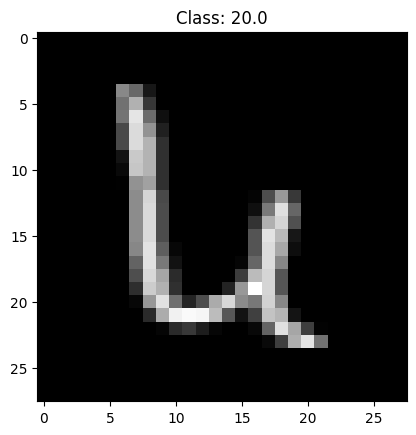

In [20]:
# Memeriksa kumpulan data AZ secara acak
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

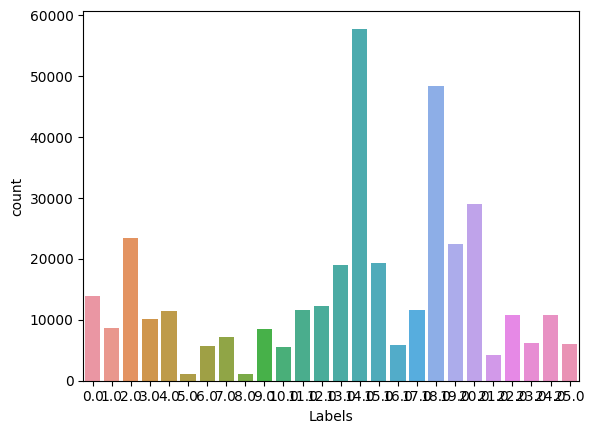

In [21]:
# Memeriksa distribusi data
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

In [22]:
# Memeriksa nilai unik dari digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
# Memeriksa nilai unik dari alfabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [24]:
# Kita telah mengetahui bahwa label angka berisi label dari 0-9 (10 label)
# Kita juga tahu bahwa label alfabet dimulai dari 0-25 yang mewakili A-Z
# Jika kita ingin menggabungkannya, label A-Z harus meneruskan label angka label_abjad += 10

alphabet_labels += 10

In [25]:
# Memeriksa label alfabet lagi
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [26]:
# Menggabungkan keduanya
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [27]:
# Memriksa shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [28]:
# Memeriksa labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [29]:
# Convert data ke float32
data = np.array(data, dtype = 'float32')

In [30]:
# Karena Konvolusional membutuhkan data 3d (termasuk kedalaman)
# dan gambar kita hanya dalam data 2d (karena dalam format greyscale)
# kita perlu menambahkan "kedalaman" pada data
data = np.expand_dims(data, axis=-1)

# Memeriksa shape
data.shape

(442450, 28, 28, 1)

# Preprocessing

In [31]:
# Normalisasi data
data /= 255.0

In [32]:
# Memeriksa nilai rentang data
data[0].min(), data[0].max()

(0.0, 1.0)

In [33]:
# Melakukan proses encoding pada label kelas menggunakan LabelBinarizer
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [34]:
# Memeriksa labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

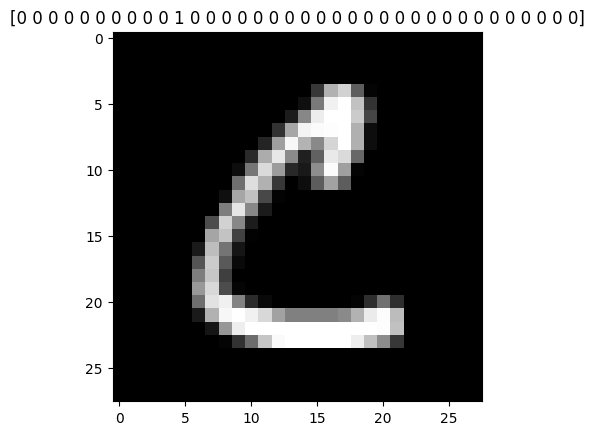

In [35]:
# Memeriksa data dengan label label binarizer
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [36]:
# Karena data tidak seimbang, menanganinya dengan memberi bobot pada data yang 'kecil'

# Memeriksa jumlah data untuk setiap label terlebih dahulu
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [37]:
# Memeriksa nilai data terbesar
classes_total.max()

57825

In [38]:
# melakukan proses pembuatan bobot (weights) untuk setiap kelas dalam dataset.

# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [39]:
# menggunakan fungsi train_test_split dari scikit-learn untuk membagi dataset menjadi subset pelatihan dan pengujian.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [40]:
# Mengimport library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
# Mendefinisikan objek ImageDataGenerator dari TensorFlow/Keras, yang digunakan untuk melakukan augmentasi data gambar.
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [76]:
# Melakukan impor beberapa modul dan kelas yang diperlukan dari pustaka TensorFlow/Keras untuk membangun dan melatih model neural network konvolusional
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
# membangun model neural network konvolusional (CNN) menggunakan TensorFlow
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [44]:
# Memeriksa network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [45]:
# Membuat actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Memeriksa actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [46]:
# Mengatur model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [47]:
# Mengatur checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [48]:
# melakukan pelatihan (fitting) model neural network dengan data pelatihan (X_train dan y_train) menggunakan generator augmentasi data.
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.2028 - accuracy: 0.8232
Epoch 1: val_loss improved from inf to 0.37632, saving model to custom_ocr.model
2765/2765 [==============================] - 139s 46ms/step - loss: 2.2023 - accuracy: 0.8232 - val_loss: 0.3763 - val_accuracy: 0.8320
Epoch 2/20
2764/2765 [============================>.] - ETA: 0s - loss: 1.0056 - accuracy: 0.9003
Epoch 2: val_loss improved from 0.37632 to 0.21738, saving model to custom_ocr.model
2765/2765 [==============================] - 130s 47ms/step - loss: 1.0056 - accuracy: 0.9003 - val_loss: 0.2174 - val_accuracy: 0.9101
Epoch 3/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.8441 - accuracy: 0.9123
Epoch 3: val_loss did not improve from 0.21738
2765/2765 [==============================] - 141s 51ms/step - loss: 0.8439 - accuracy: 0.9124 - val_loss: 0.2428 - val_accuracy: 0.8958
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.7377 - accu

# Evaluate Model

## Make a Single Prediction

In [49]:
# Membuat prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [50]:
# Memeriksa prediksi untuk data-0
# Yang tertinggi adalah prediksi
predictions[1]

array([2.15568337e-21, 1.03227565e-11, 3.83280593e-13, 1.38932563e-14,
       3.51036994e-21, 4.95116115e-10, 8.51663349e-20, 1.35362027e-15,
       5.05126179e-17, 7.45101548e-20, 1.66734524e-23, 4.37724347e-13,
       1.04802321e-12, 5.22212427e-13, 1.29305461e-13, 1.17501427e-15,
       9.39315069e-16, 1.09308416e-15, 9.99914765e-01, 8.52397861e-05,
       1.53692624e-13, 3.77466504e-13, 8.02441408e-28, 2.84345972e-19,
       7.79528402e-15, 7.59628295e-15, 6.05074993e-20, 1.45433102e-20,
       7.55063720e-11, 1.92926883e-08, 4.43269653e-16, 7.79184104e-21,
       1.64141573e-21, 1.04009483e-17, 8.72734044e-15, 4.62375381e-11],
      dtype=float32)

In [51]:
# Mendapatkan prediksi aktual -> probabilitas tertinggi
np.argmax(predictions[1])

18

In [52]:
# Memeriksa label
name_labels[18]

'I'

In [53]:
# Memeriksa y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
# check the highest value
np.argmax(y_test[1])

18

In [55]:
# Memeriksa label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [56]:
# Evaluasi test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 10s 3ms/step - loss: 0.1629 - accuracy: 0.9395


[0.16293293237686157, 0.939484715461731]

In [57]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.28      0.77      0.41      1381
           1       0.98      0.98      0.98      1575
           2       0.95      0.95      0.95      1398
           3       0.99      0.98      0.99      1428
           4       0.85      0.98      0.91      1365
           5       0.70      0.93      0.80      1263
           6       0.95      0.98      0.96      1375
           7       0.97      0.99      0.98      1459
           8       0.88      0.99      0.94      1365
           9       0.96      0.98      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.96      0.98      1734
           C       0.99      0.98      0.99      4682
           D       0.91      0.96      0.94      2027
           E       0.99      0.97      0.98      2288
           F       0.88      1.00      0.93       233
           G       0.96      0.94      0.95      1152
           H       0.98    

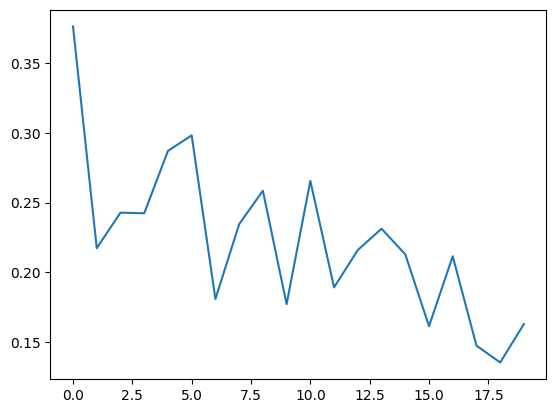

In [58]:
# Visualisasi nilai kerugian untuk setiap zaman
plt.plot(history.history['val_loss'])

In [59]:
# Memeriksa metrik lainnya
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

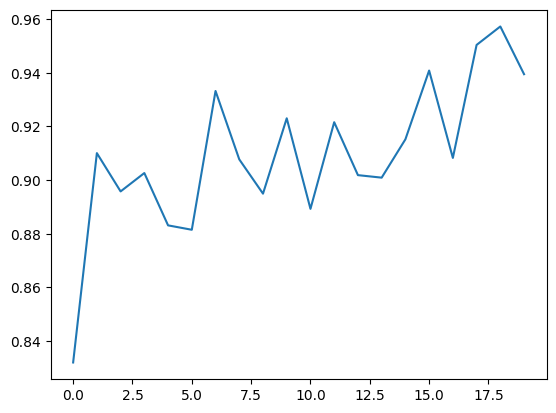

In [60]:
# Memeriksa kinerja model dengan akurasi validasi
plt.plot(history.history['val_accuracy'])

# Save The Model

In [61]:
# Hasilnya akan ditampilkan di direktori colab
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [62]:
# Mengimport library
from tensorflow.keras.models import load_model

In [63]:
# Memuat saved network
load_network = load_model('network')

In [64]:
# Memeriksa summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

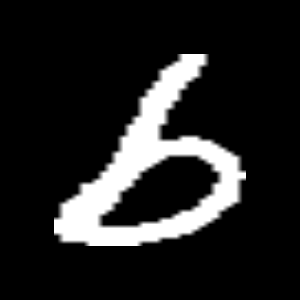

In [66]:
# Memuat Gambar
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [67]:
# Memeriksa shape
img.shape

(300, 300, 3)

In [68]:
# Mengkonversi ke abu
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Memeriksa shape
gray_img.shape

(300, 300)

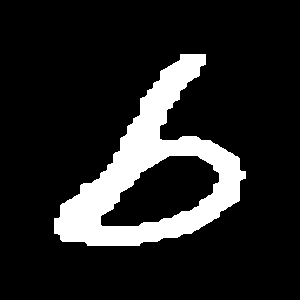

120.0


In [69]:
# melakukan prapemrosesan gambar menggunakan teknik binary thresholding dan metode Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [70]:
# Mengubah ukuran gambar agar sesuai dengan bentuk input jaringan -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [71]:
# Konversi ke float 32 dan memperluas dimensi karena bentuk input jaringan adalah 28*28*1

img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# Memeriksa shape
img_input.shape

(28, 28, 1)

In [72]:
# Menambahkan jumlah data sebagai dimensi
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [73]:
# Membuat Prediksi
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 168ms/step


6

In [74]:
# Memuat labels [6]
name_labels[6]

'6'

Kesimpulan :

Dari hasil model CNN yang dilatih sebelumnya, hasil prediksinya sangat akurat, namun masih salah untuk gambar dengan input “B kecil” di atas. Hal ini mungkin juga disebabkan oleh kesamaan. Oleh karena itu, model membuat prediksi berdasarkan indeks nama_label ke-6 yang bernilai '6'.